In [1]:
#%matplotlib widget
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

import timeSeriesInsightToolkit as tsi


# Load positions

In [3]:
basePath = "/var/www/html/records/proc/bfanini-20231026-kjtgo0m0w/" #"C:/Users/g_gos/records/proc/bfanini-20231026-kjtgo0m0w/"  #"path/to/group/folder/"
pathSes  = basePath + "preprocessed-VR-sessions-gated/" 
ids, fileNames, dfSs, df = tsi.readData(pathSes)
ids, fileNames, [paths,dpaths,fpaths] = tsi.getVarsFromSession(pathSes,['pos','dir','f'])
#print(fpaths[0].shape, paths[1].shape)
bbox = tsi.makeBBox(paths,dpaths,fpaths)


In [4]:
bbox

{'x0': -6.505999999999999,
 'x1': 5.856,
 'y0': -0.04500000000000004,
 'y1': 5.01,
 'z0': -6.006,
 'z1': 5.936}

<IPython.core.display.Javascript object>


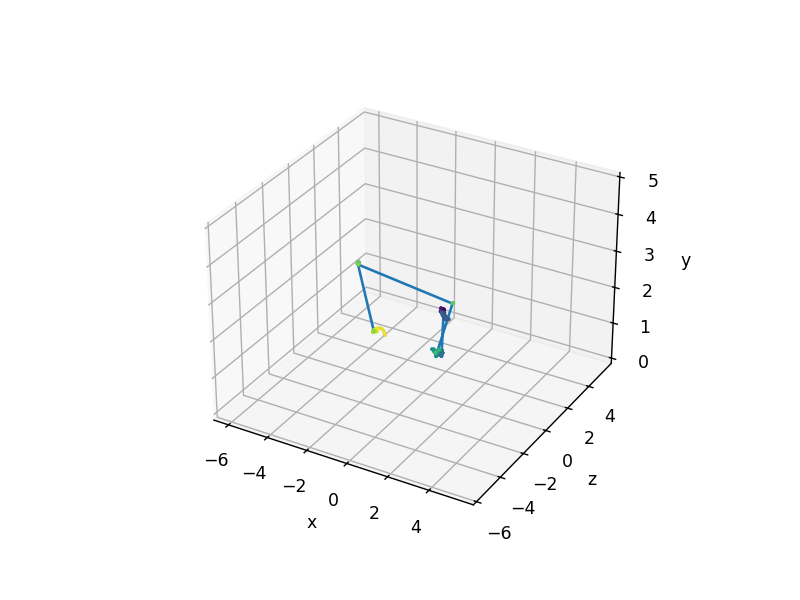

<IPython.core.display.Javascript object>


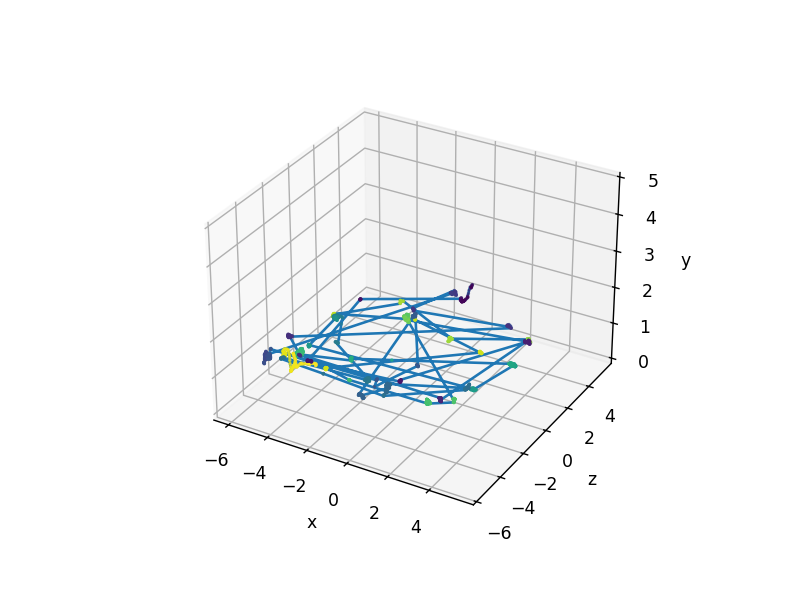

<IPython.core.display.Javascript object>


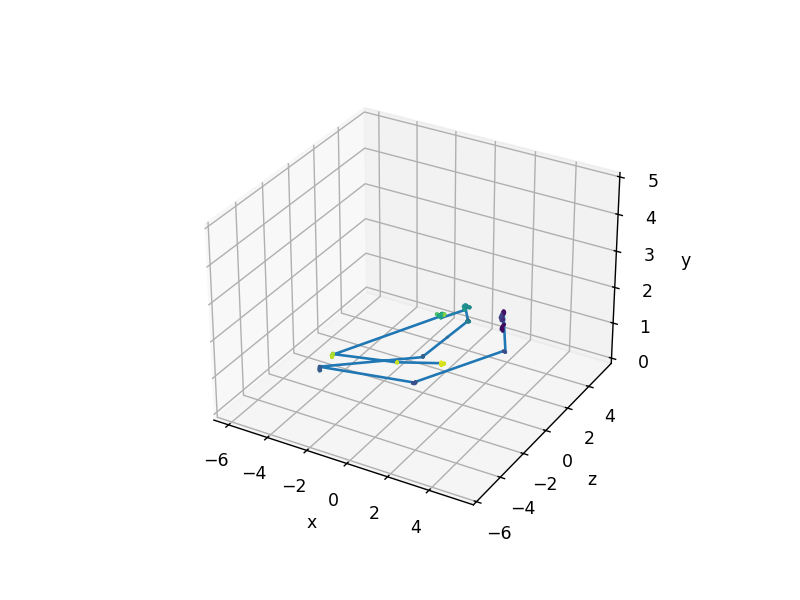

<IPython.core.display.Javascript object>


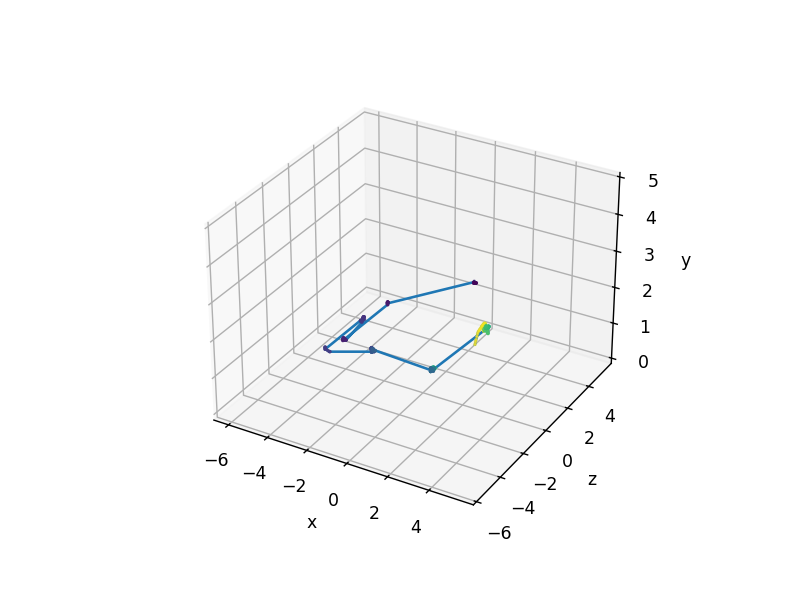

<IPython.core.display.Javascript object>


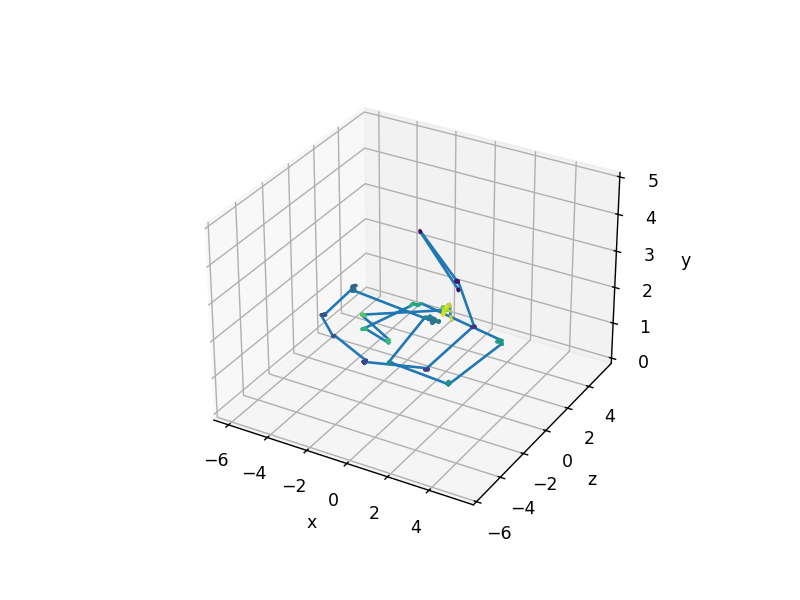

<IPython.core.display.Javascript object>


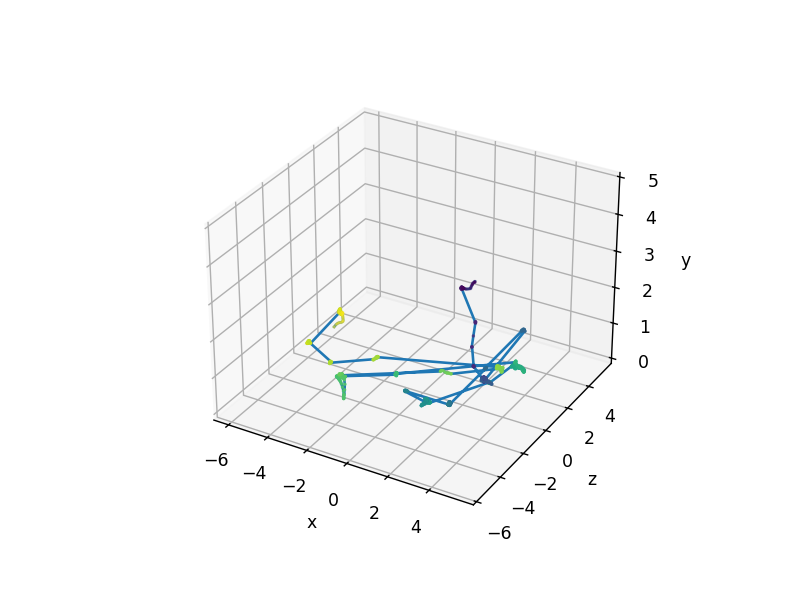

<IPython.core.display.Javascript object>


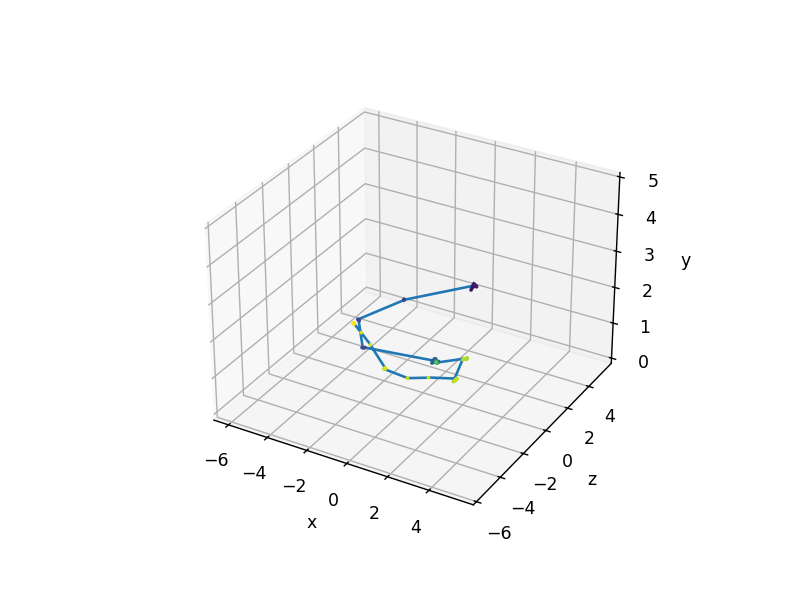

<IPython.core.display.Javascript object>


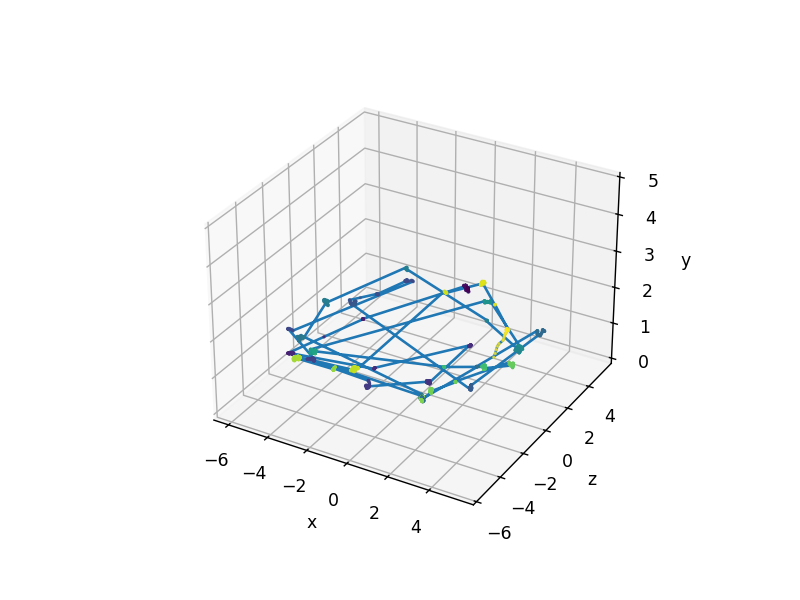

<IPython.core.display.Javascript object>


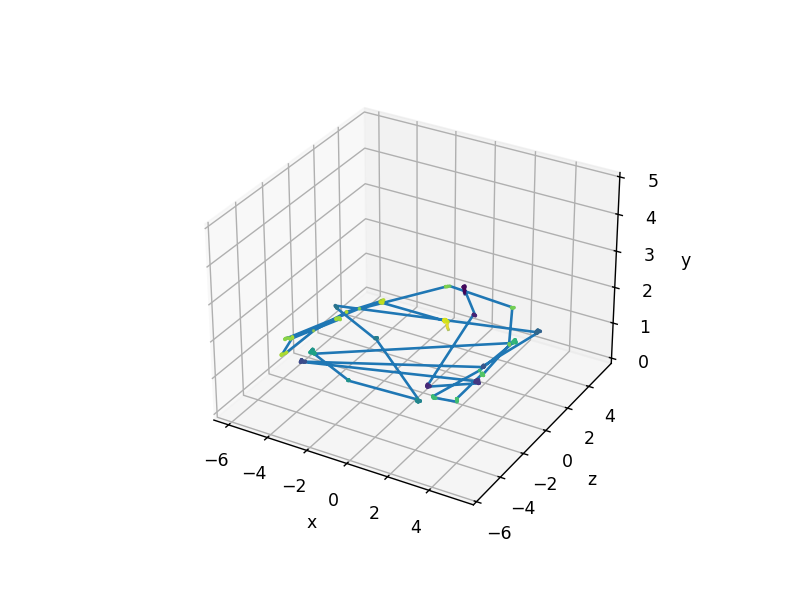

<IPython.core.display.Javascript object>


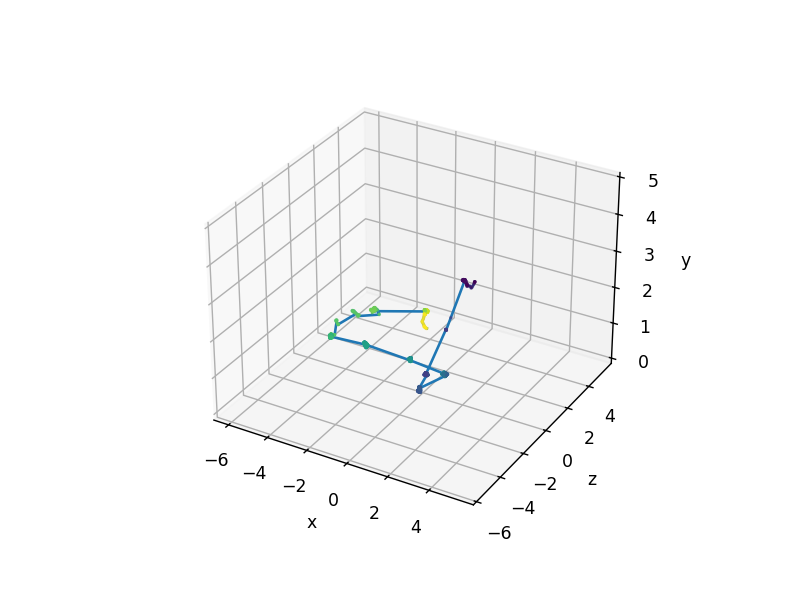

<IPython.core.display.Javascript object>


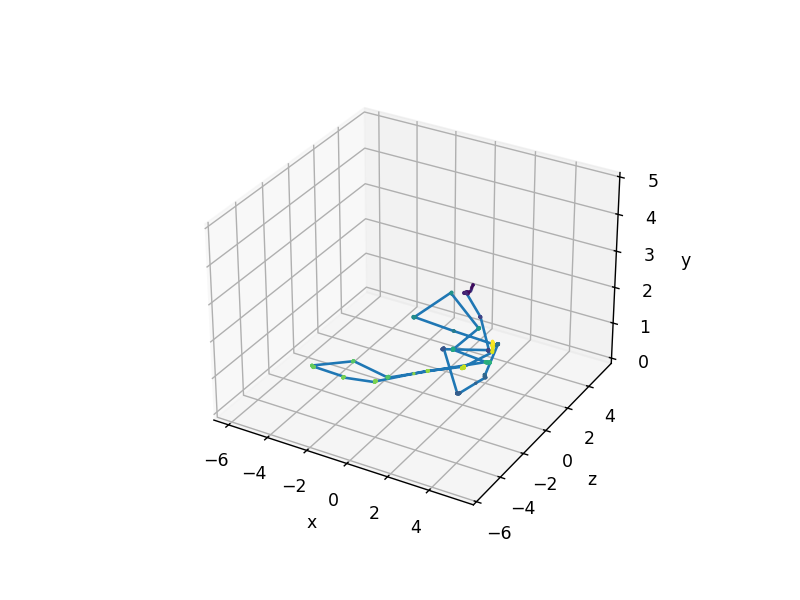

<IPython.core.display.Javascript object>


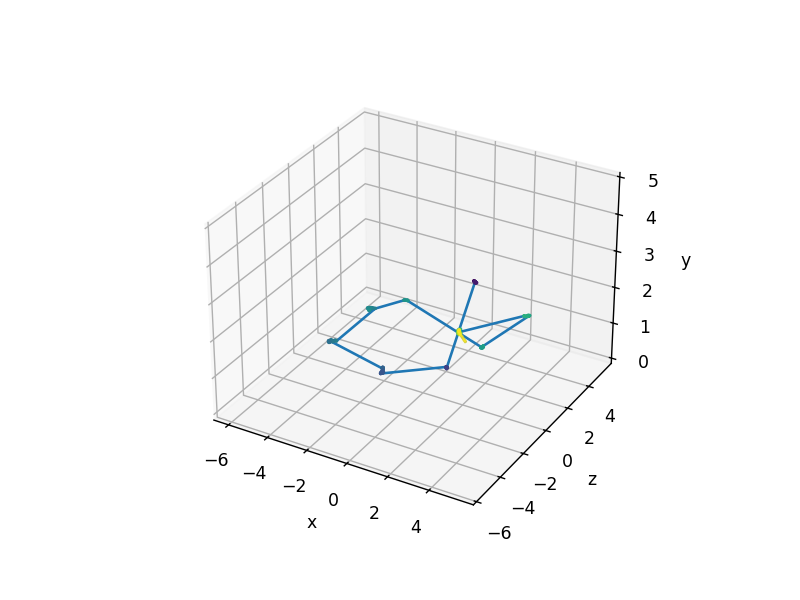

<IPython.core.display.Javascript object>


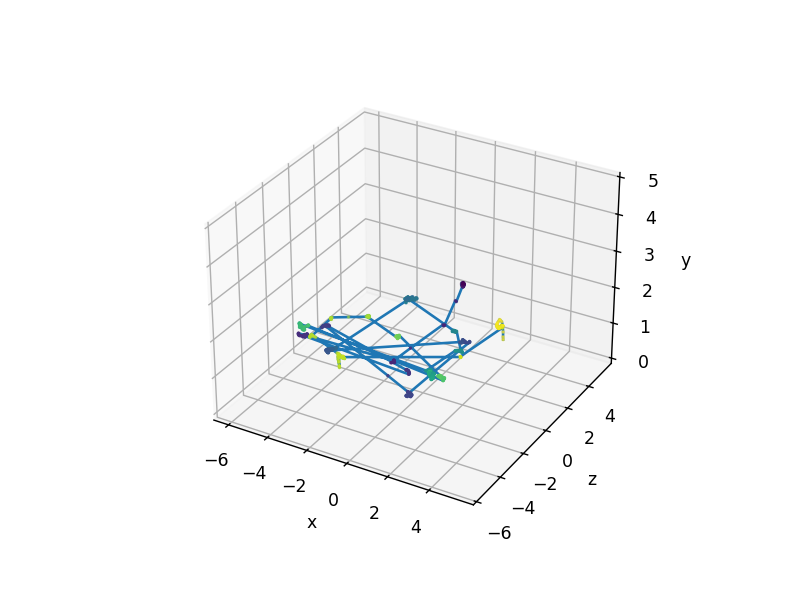

<IPython.core.display.Javascript object>


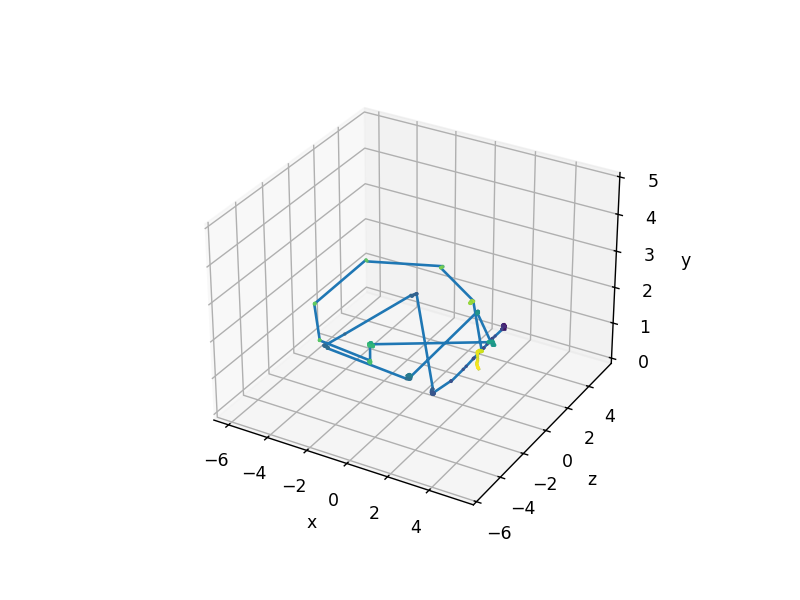

<IPython.core.display.Javascript object>


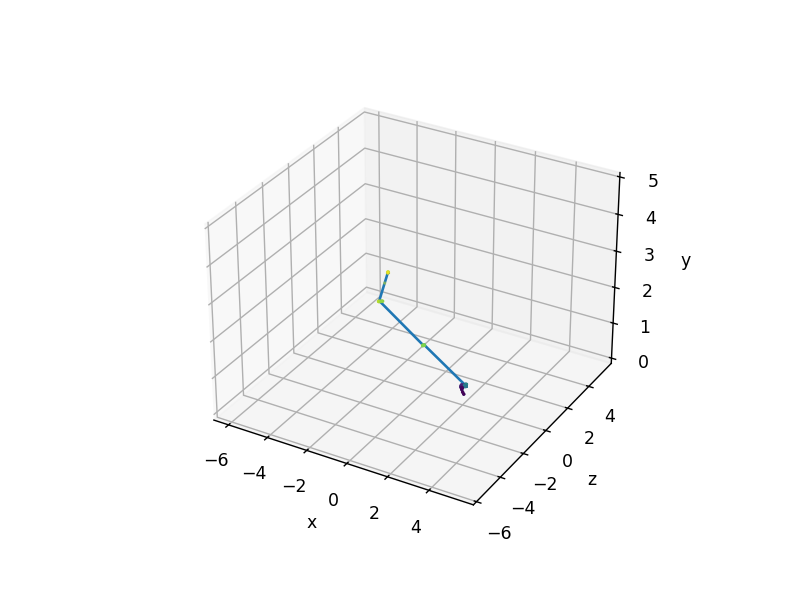

<IPython.core.display.Javascript object>


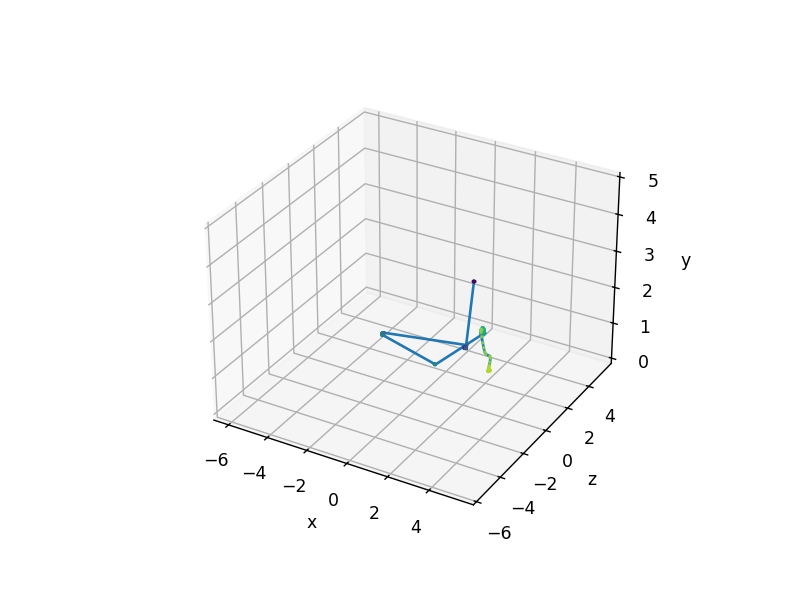

<IPython.core.display.Javascript object>


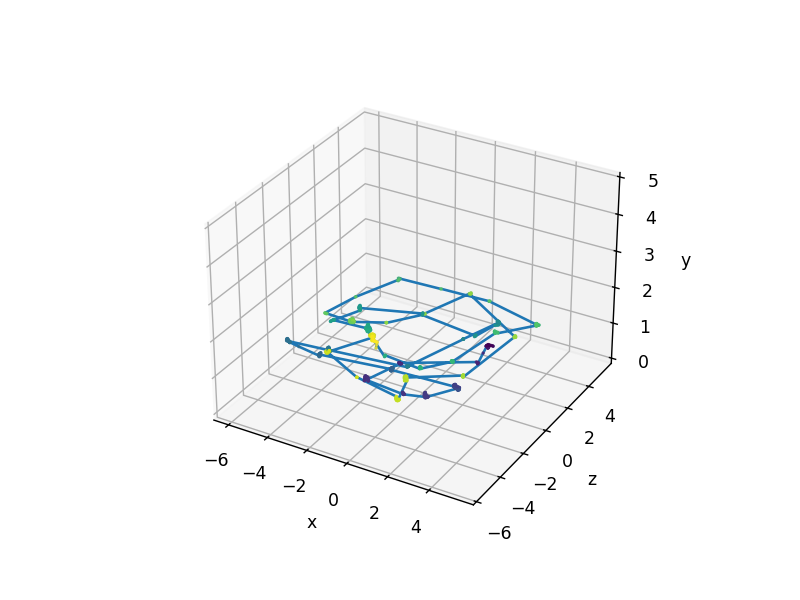

<IPython.core.display.Javascript object>


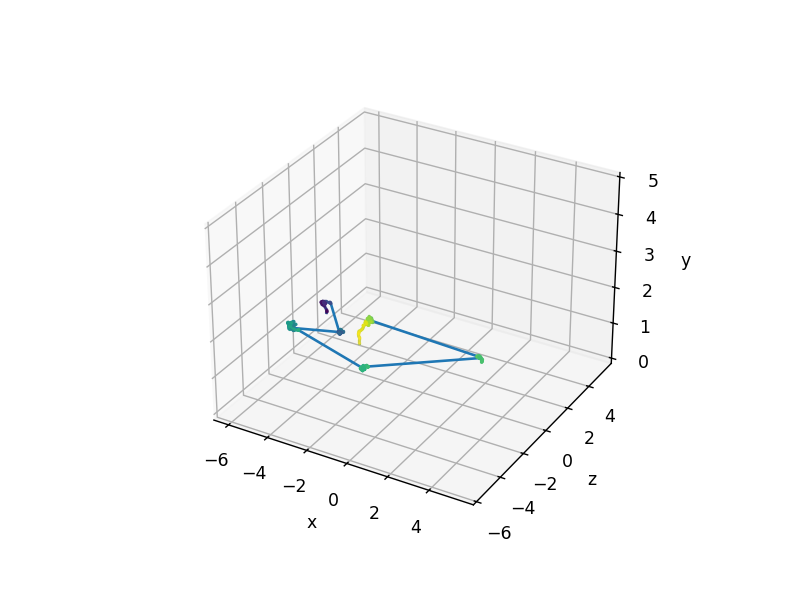

<IPython.core.display.Javascript object>


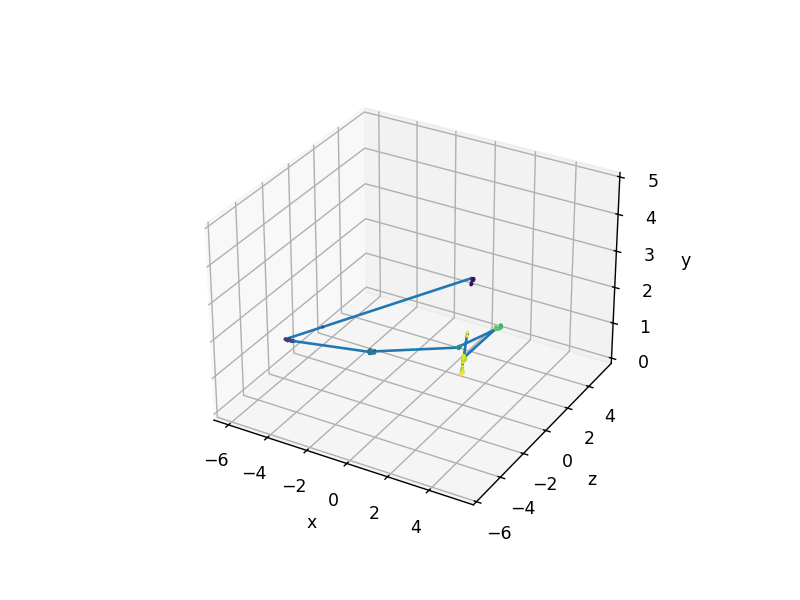

<IPython.core.display.Javascript object>


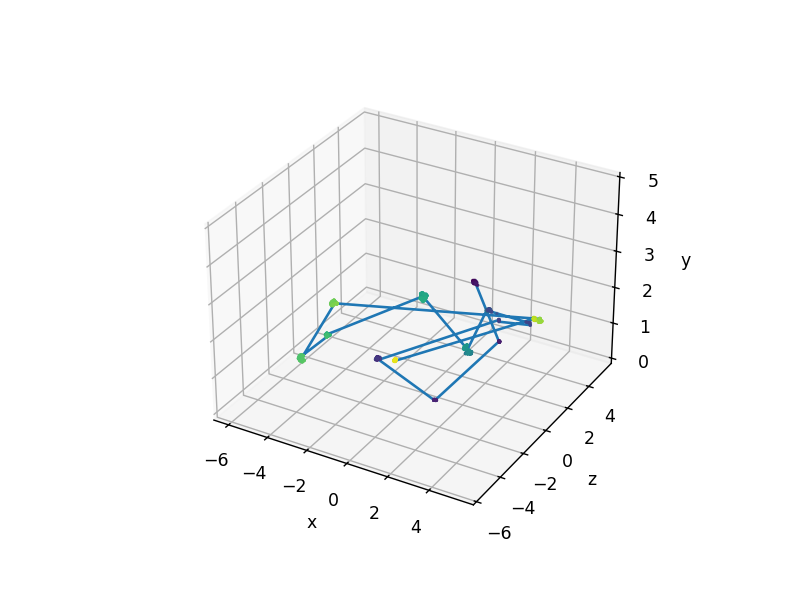

/home/ggosti/Code/TimeSeriesInsightToolkit/timeSeriesInsightToolkit.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


<IPython.core.display.Javascript object>


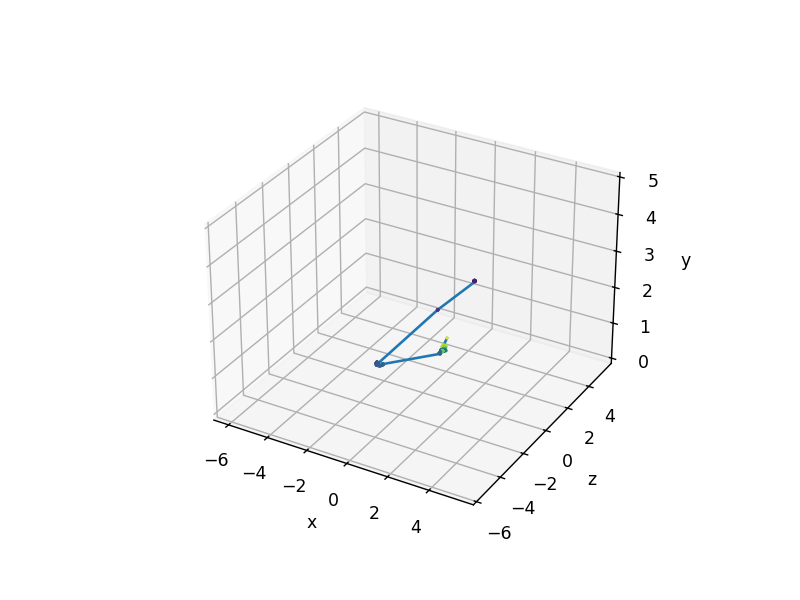

<IPython.core.display.Javascript object>


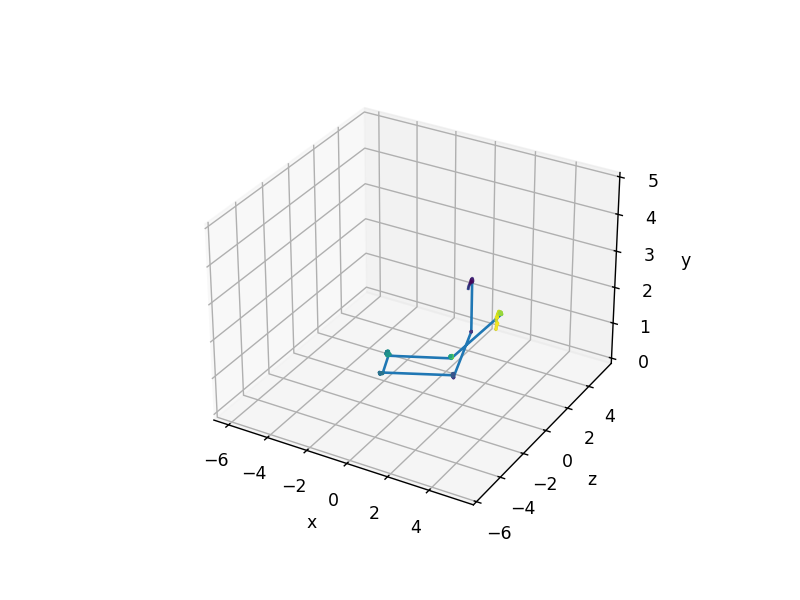

<IPython.core.display.Javascript object>


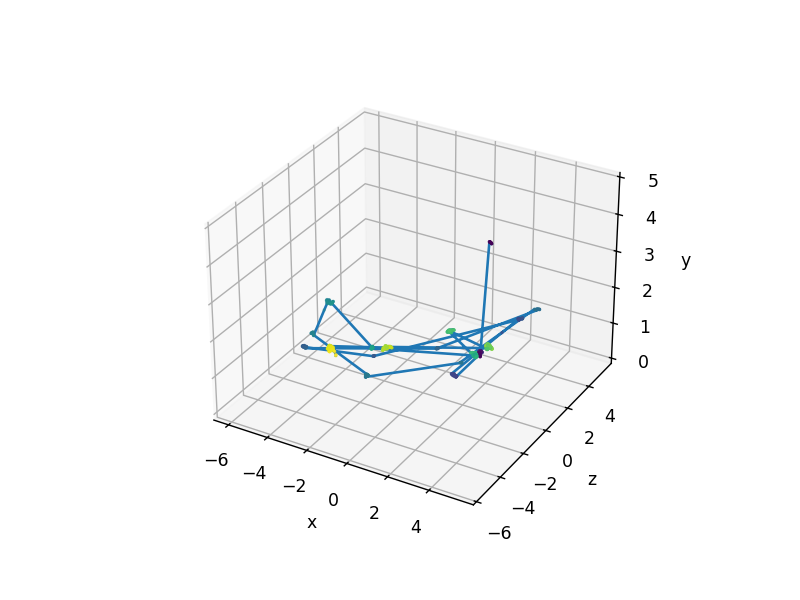

<IPython.core.display.Javascript object>


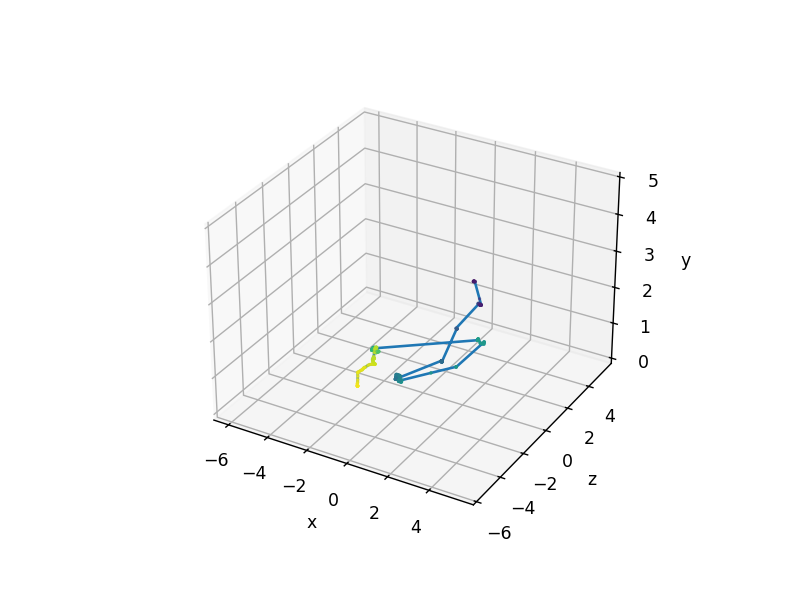

<IPython.core.display.Javascript object>


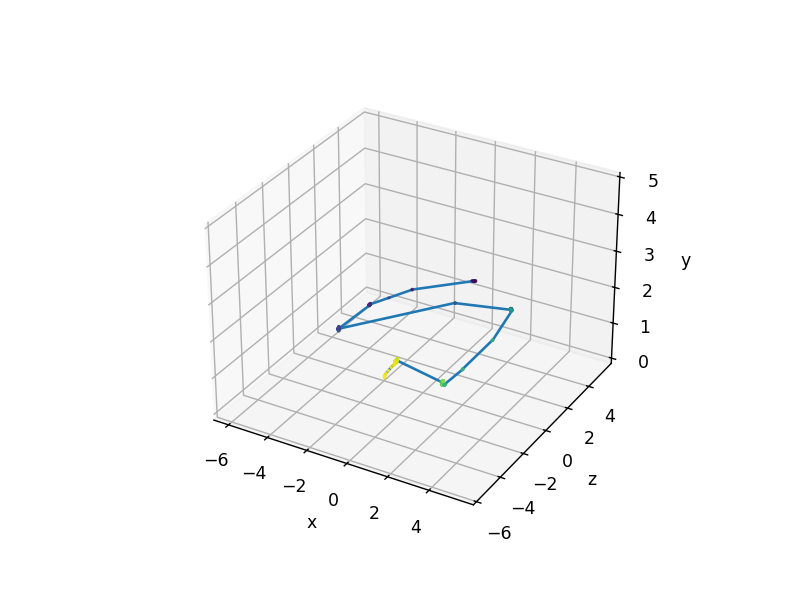

<IPython.core.display.Javascript object>


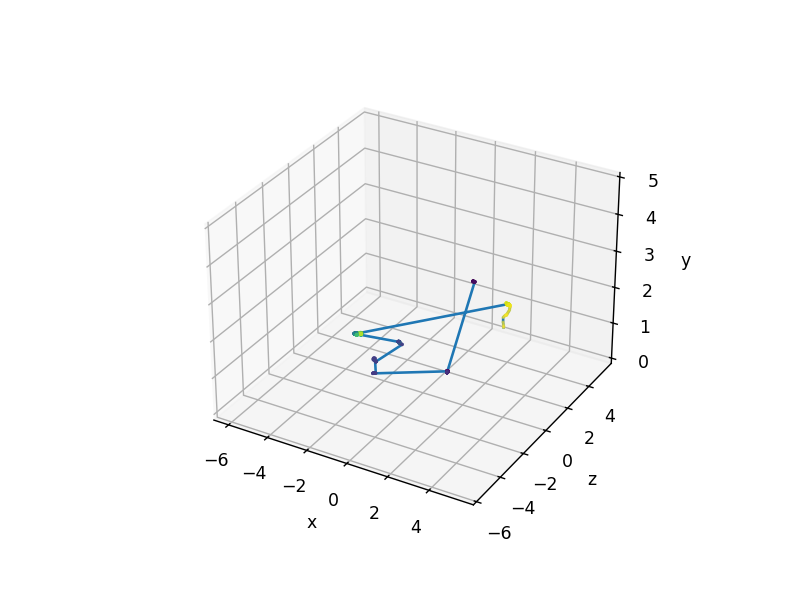

<IPython.core.display.Javascript object>


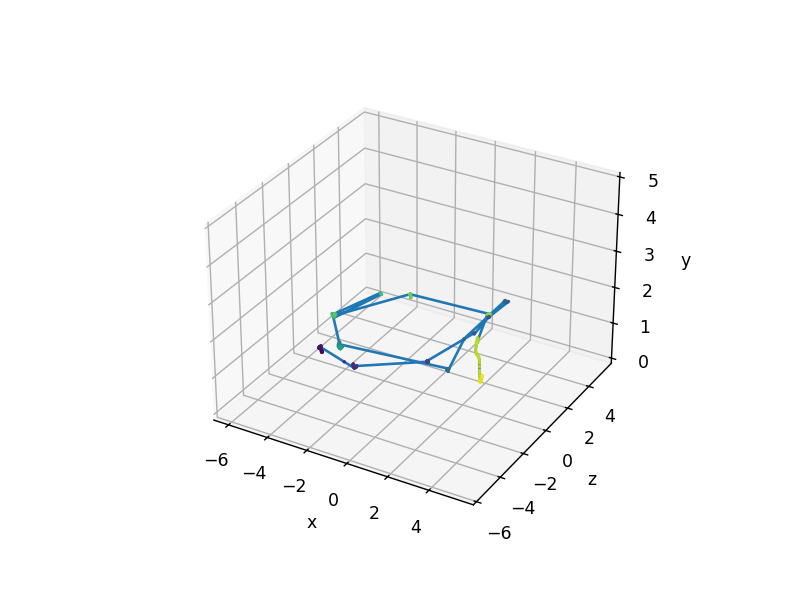

<IPython.core.display.Javascript object>


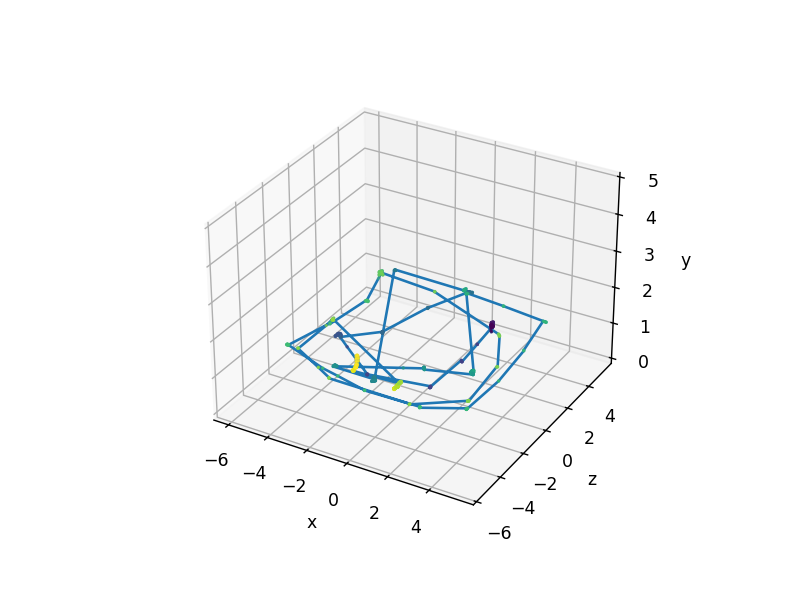

<IPython.core.display.Javascript object>


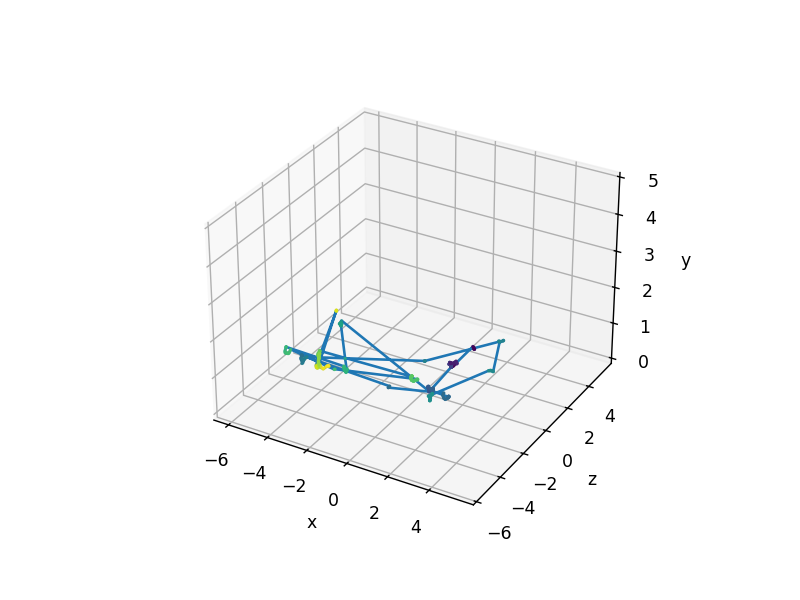

<IPython.core.display.Javascript object>


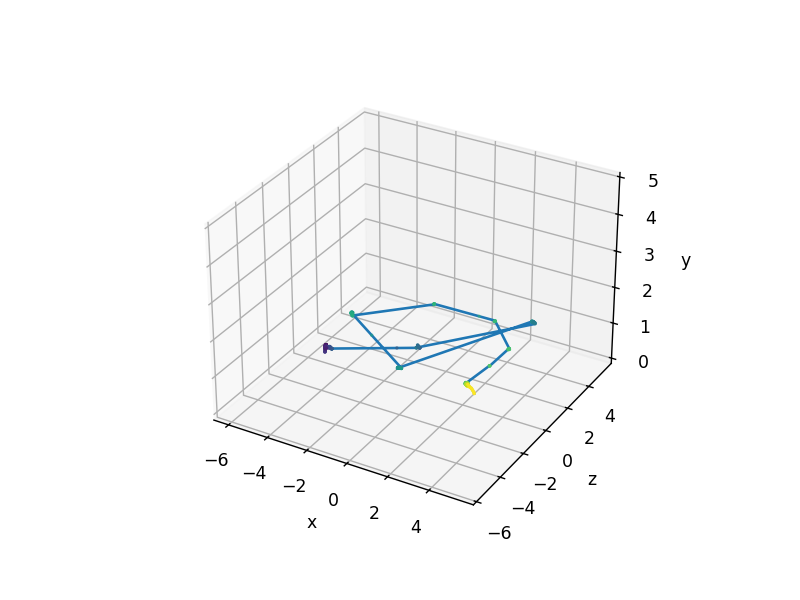

<IPython.core.display.Javascript object>


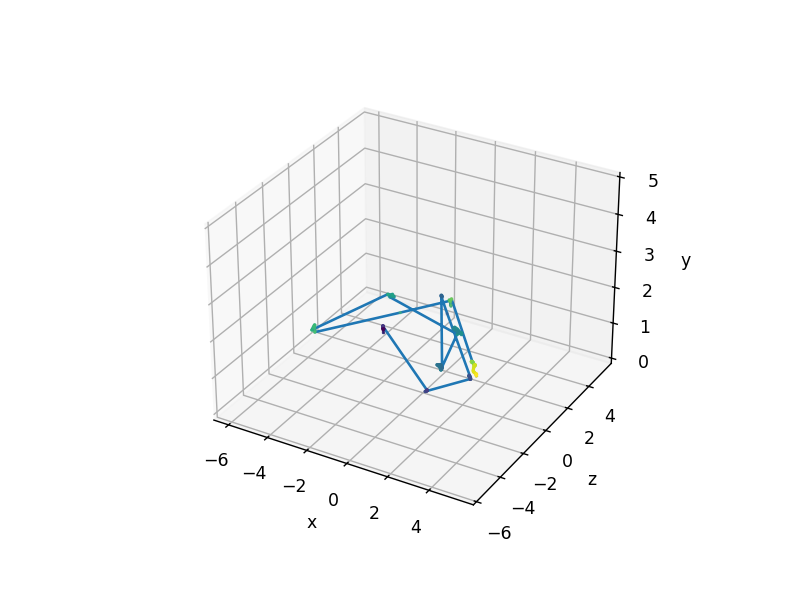

<IPython.core.display.Javascript object>


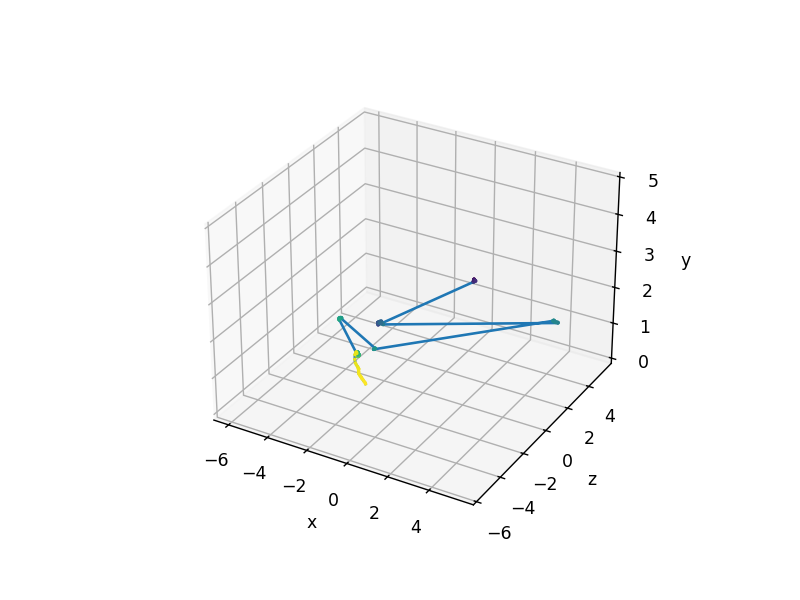

In [5]:
for uId in ids:
    path = paths[uId] #ts[uId],xs[uId],ys[uId],zs[uId]
    #dpath = dpaths[uId]
    tsi.drawPath(path, dpath=None, BBox=bbox)
    #plt.stop()

## 3D Clustering

<IPython.core.display.Javascript object>


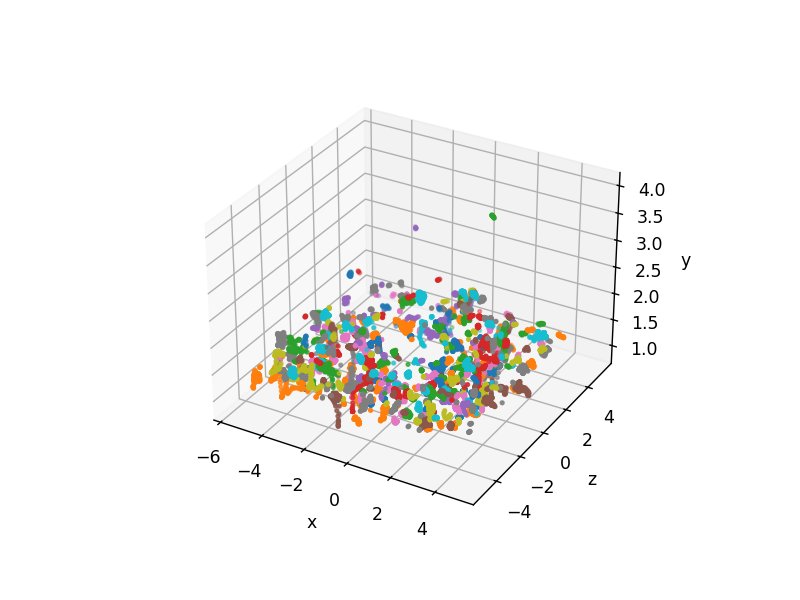

In [6]:
tsi.allPaths3D(paths)

<IPython.core.display.Javascript object>


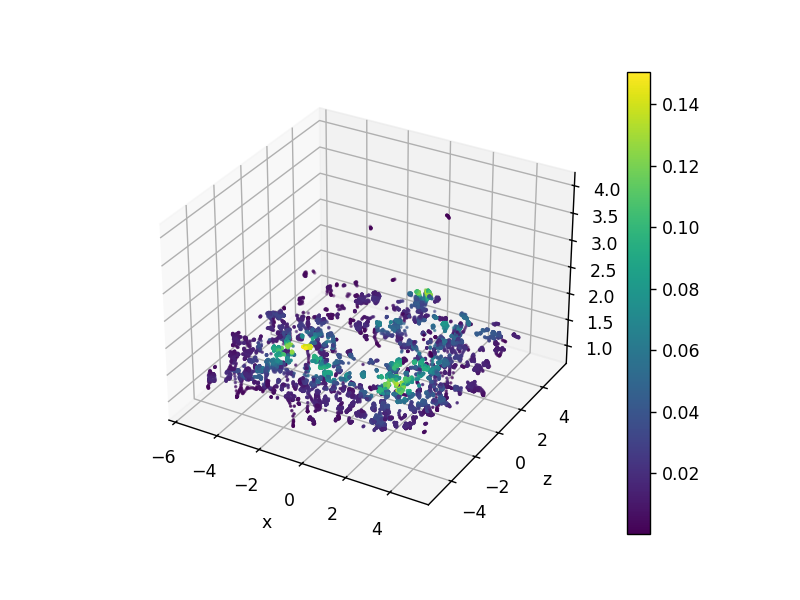

In [7]:
pathsConc =  np.vstack(paths)
tConv,xConc,yConc,zConc = pathsConc.T#np.concatenate(xs),np.concatenate(ys),np.concatenate(zs)

xyz = np.vstack([xConc,yConc,zConc])
kde = stats.gaussian_kde(xyz)
density = kde(xyz)

tsi.plotKDE(xConc,yConc,zConc,density)

1


<IPython.core.display.Javascript object>


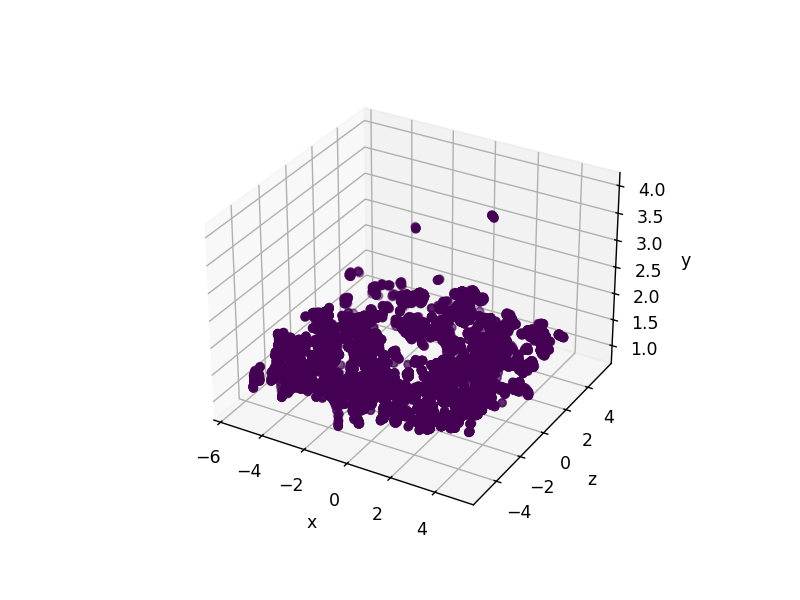

2


<IPython.core.display.Javascript object>


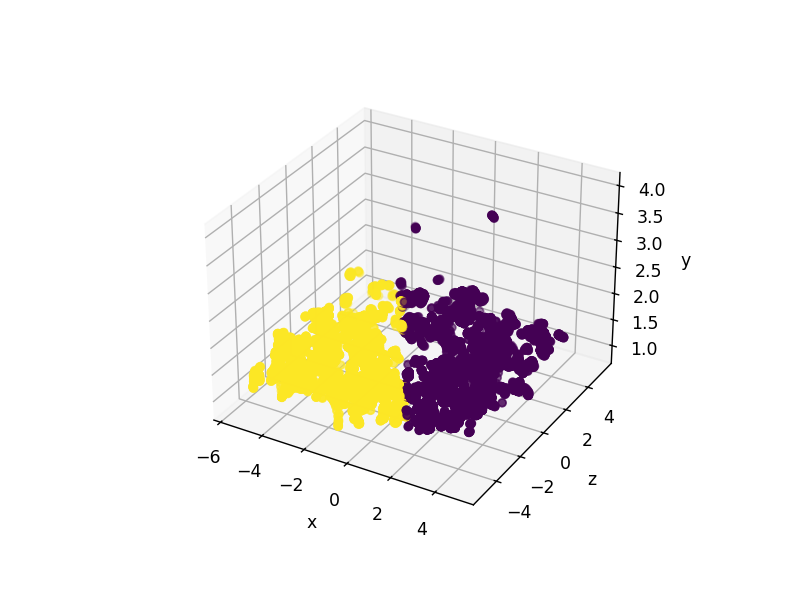

3


<IPython.core.display.Javascript object>


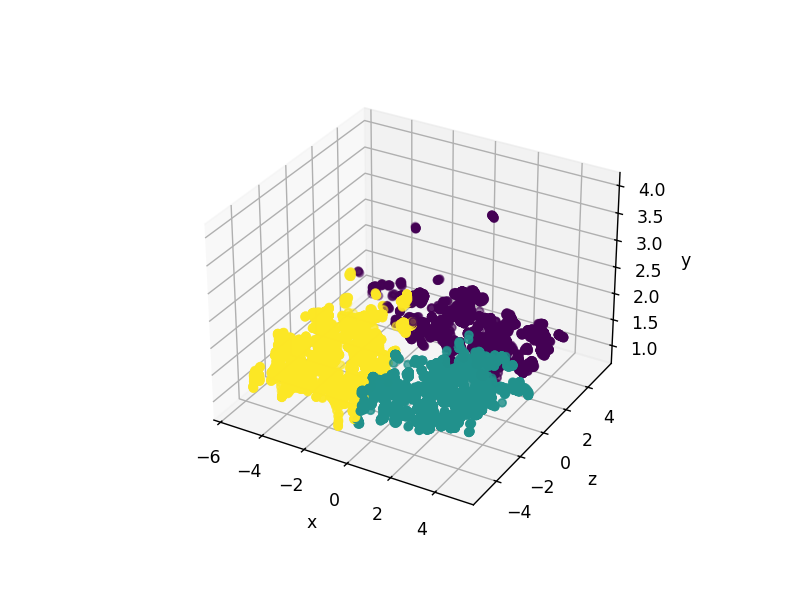

4


<IPython.core.display.Javascript object>


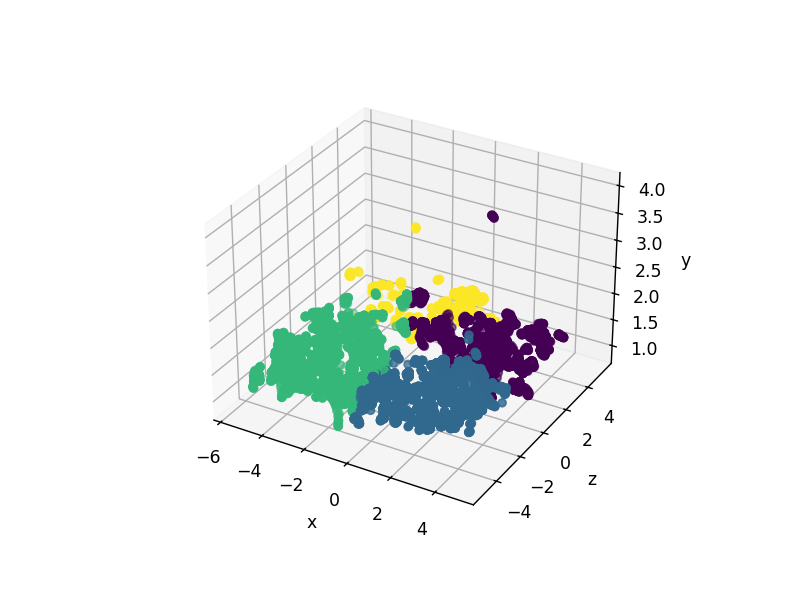

5


<IPython.core.display.Javascript object>


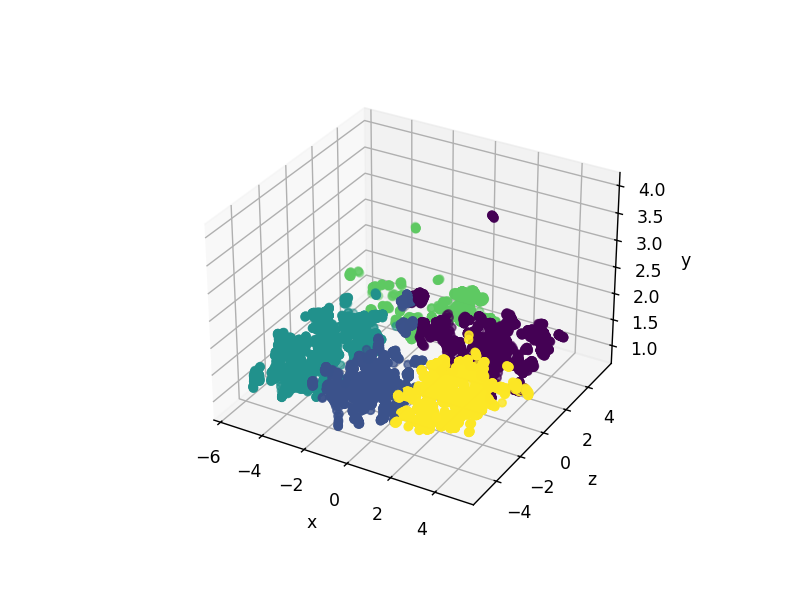

6


<IPython.core.display.Javascript object>


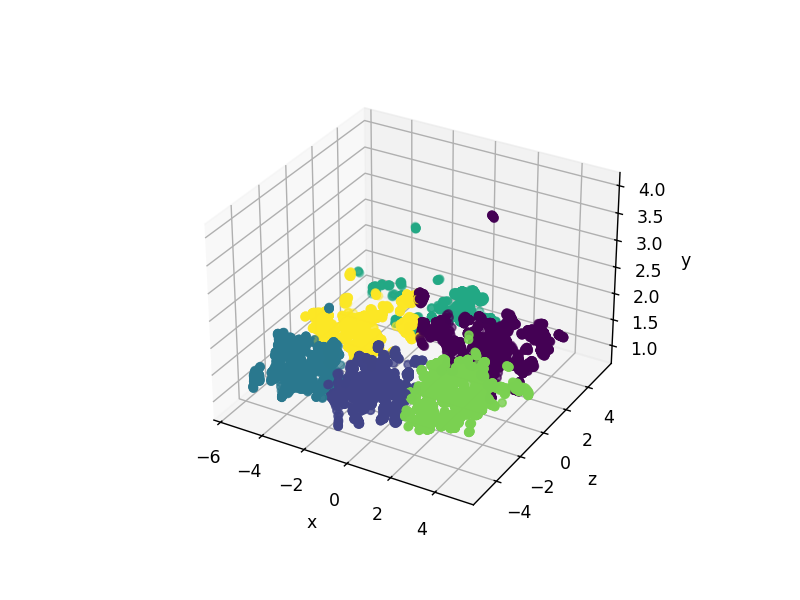

7


<IPython.core.display.Javascript object>


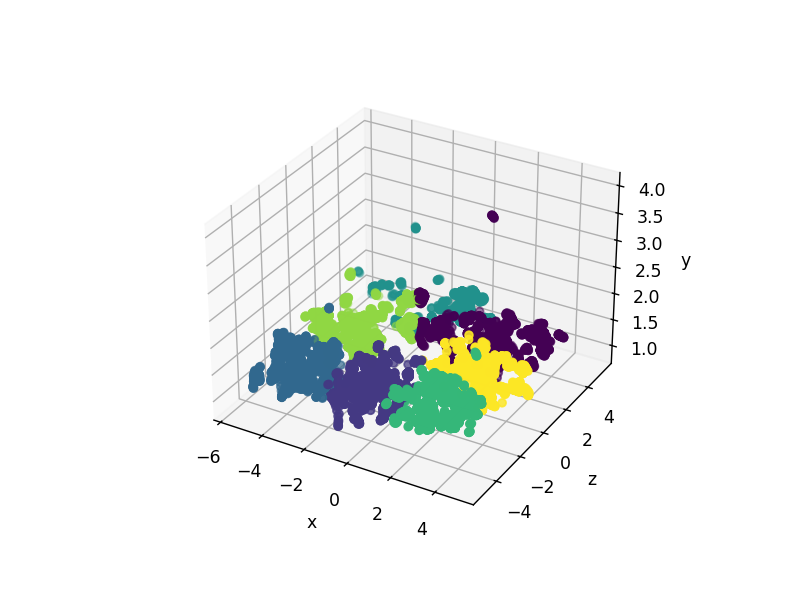

8


<IPython.core.display.Javascript object>


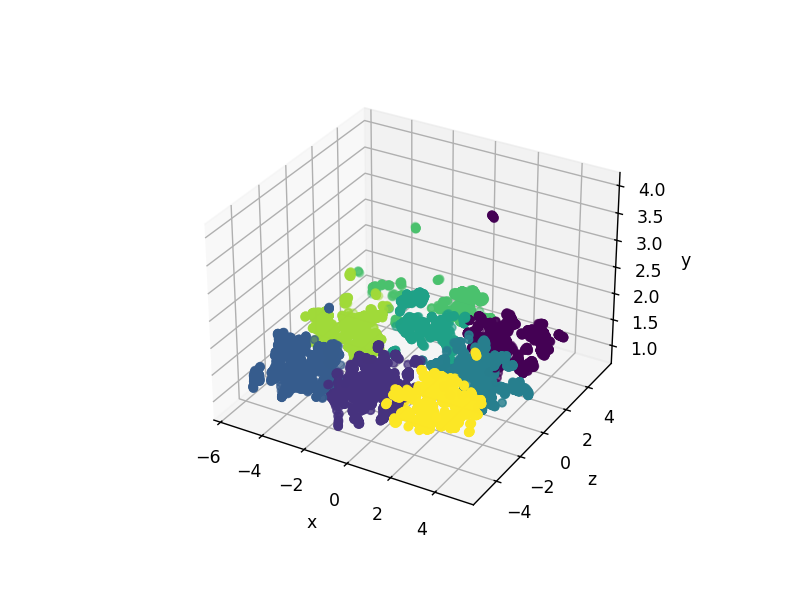

9


<IPython.core.display.Javascript object>


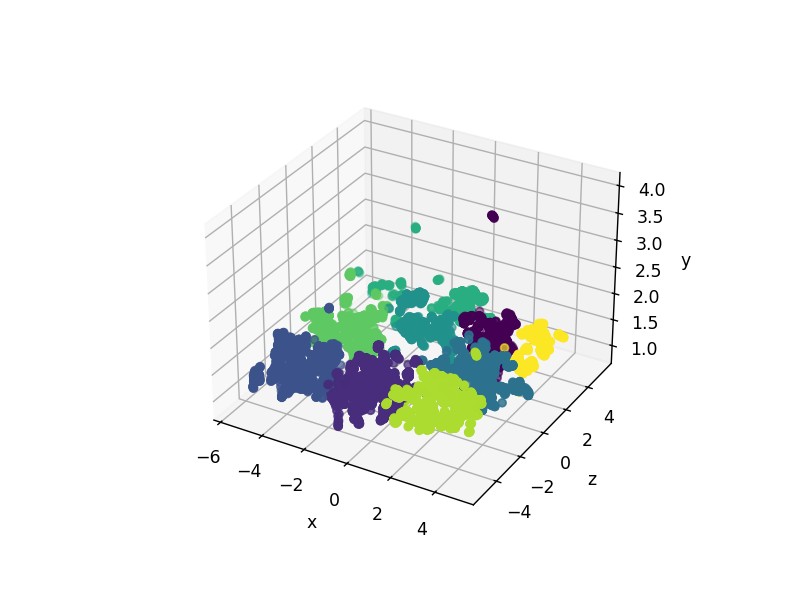

10


<IPython.core.display.Javascript object>


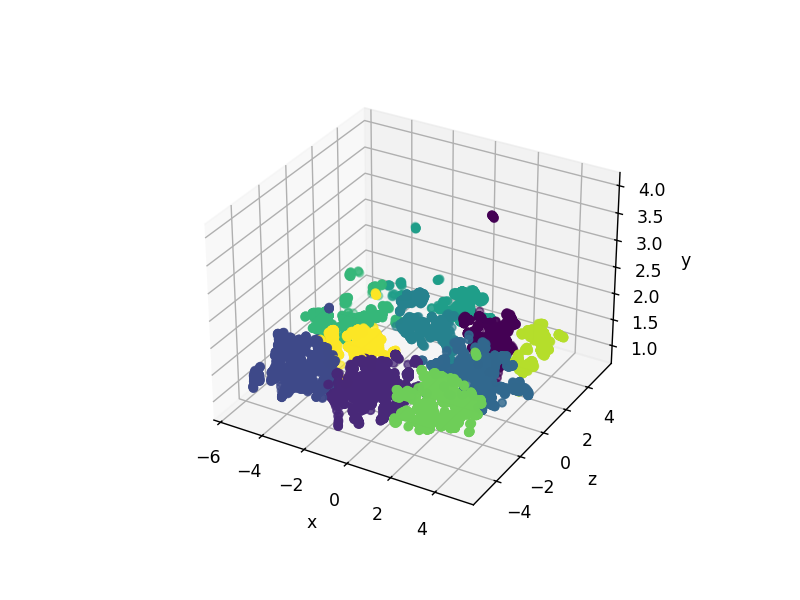

11


<IPython.core.display.Javascript object>


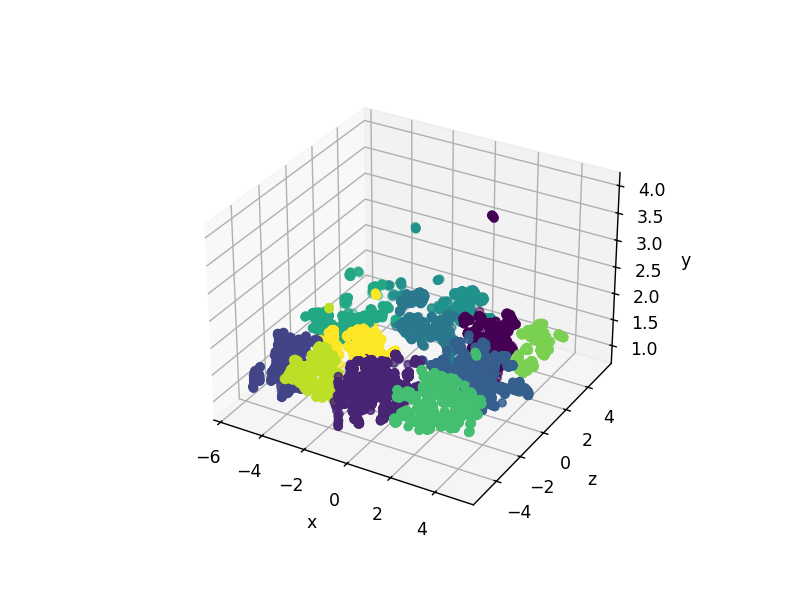

12


<IPython.core.display.Javascript object>


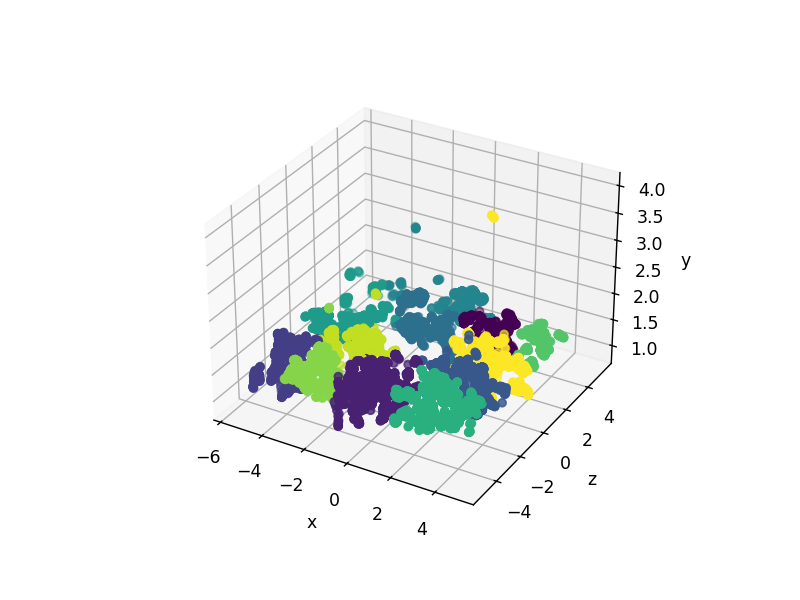

13


<IPython.core.display.Javascript object>


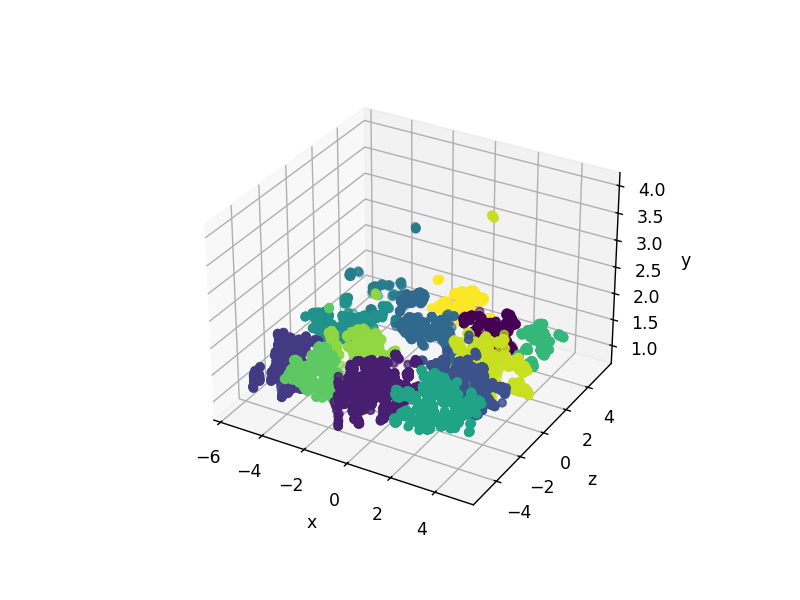

14


<IPython.core.display.Javascript object>


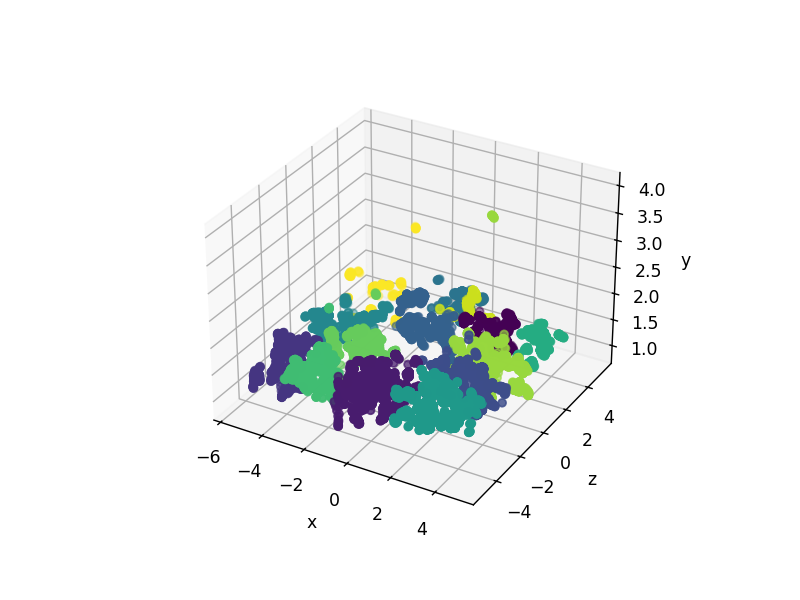

In [8]:
from sklearn.cluster import KMeans

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}



X = xyz.T

sses = []
sses_n_cls = []

silhouette_scores = []
silhouette_scores_n_cls = []

calinski_harabasz_score = []
calinski_harabasz_scores_n_cls = []

davies_bouldin_scores = []
davies_bouldin_scores_n_cls = []

for n_cl in range(1,15):
    
    print(n_cl)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    kmeans = KMeans(n_clusters=n_cl, **common_params)
    labels = kmeans.fit_predict(X)
    ax.scatter(X[:, 0], X[:, 2], X[:, 1], c=labels)
    
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_zlabel('y')

    sse = kmeans.inertia_ 
    sses.append(sse)
    sses_n_cls.append(n_cl)

    if n_cl>1:
        sil = metrics.silhouette_score(X, labels, metric='euclidean')
        silhouette_scores.append(sil)
        silhouette_scores_n_cls.append(n_cl)
        ch = metrics.calinski_harabasz_score(X, labels)
        calinski_harabasz_score.append(ch)
        calinski_harabasz_scores_n_cls.append(n_cl)
        db = metrics.davies_bouldin_score(X, labels)
        davies_bouldin_scores.append(db)
        davies_bouldin_scores_n_cls.append(n_cl)

<IPython.core.display.Javascript object>


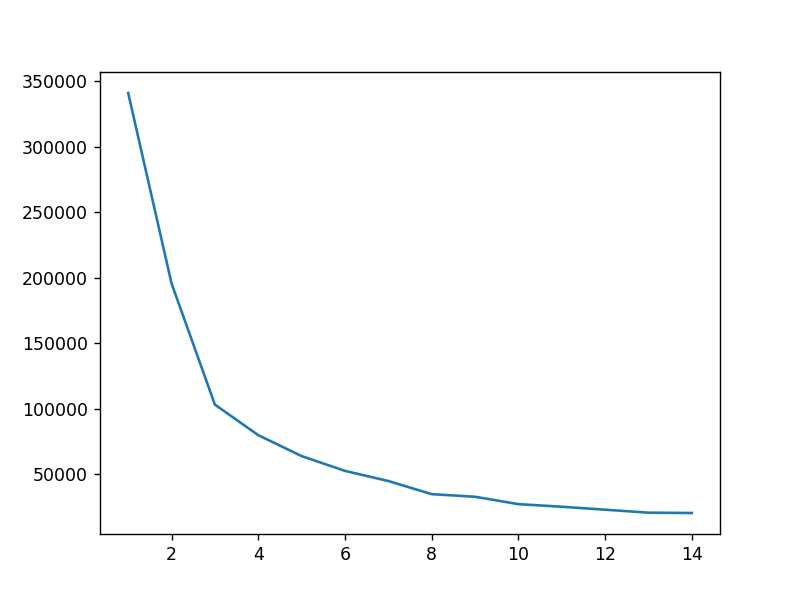

<IPython.core.display.Javascript object>


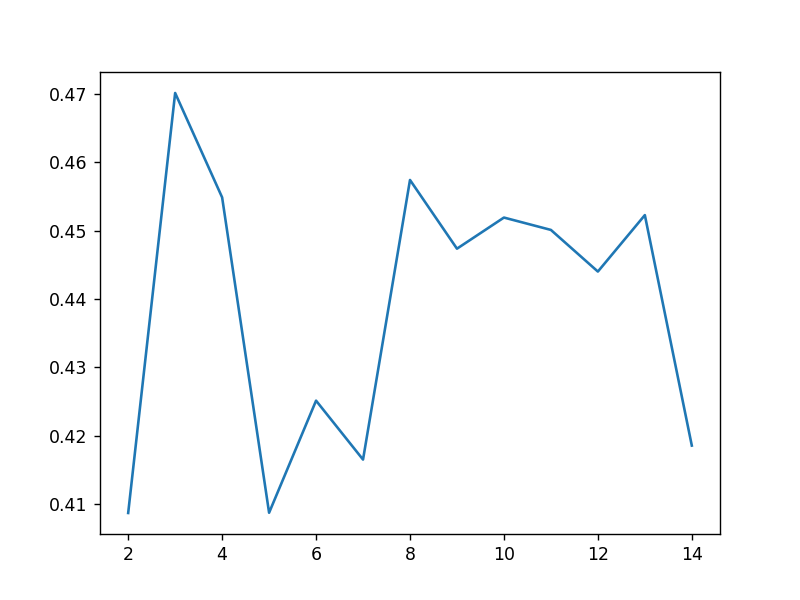

<IPython.core.display.Javascript object>


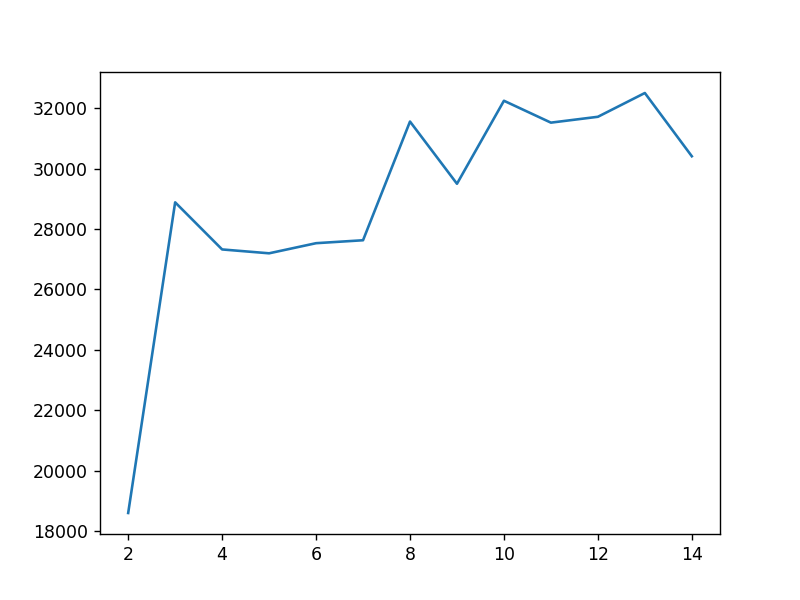

<IPython.core.display.Javascript object>


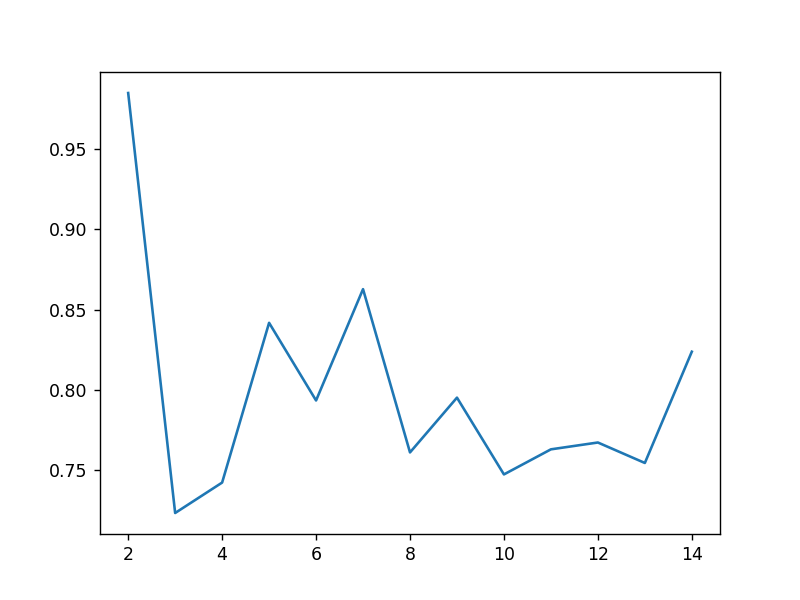

In [9]:
plt.figure()
plt.plot(sses_n_cls,sses)
plt.figure()
plt.plot(silhouette_scores_n_cls,silhouette_scores)
plt.figure()
plt.plot(calinski_harabasz_scores_n_cls,calinski_harabasz_score)
plt.figure()
plt.plot(davies_bouldin_scores_n_cls,davies_bouldin_scores)

## 2D Clustering

<IPython.core.display.Javascript object>


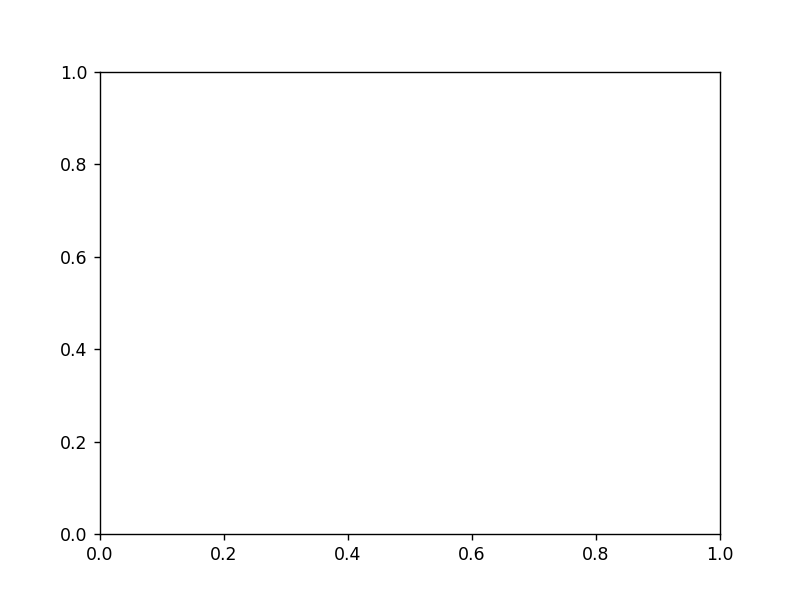

UnboundLocalError: cannot access local variable 'x' where it is not associated with a value

In [6]:
tsi.allPaths2D(paths)

<IPython.core.display.Javascript object>


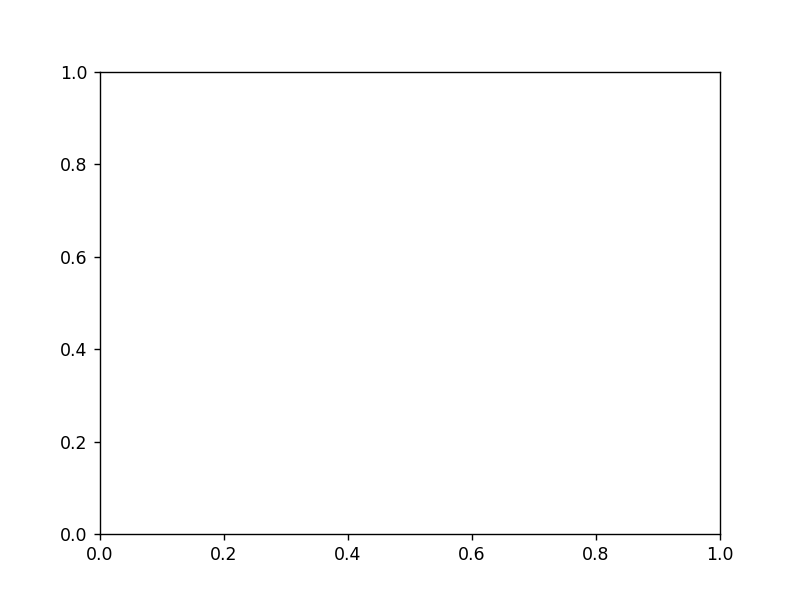

TypeError: object of type 'numpy.float64' has no len()

In [13]:
pathsConc =  np.vstack(paths)
tConv,xConc,yConc,zConc = pathsConc.T
tsi.allPaths2D(xConc,zConc)

In [12]:
pathsConc =  np.vstack(paths)
tConv,xConc,yConc,zConc = pathsConc.T

[array([[ 8.322e+02,  6.800e-02,  1.570e+00,  1.680e+00],
        [ 8.324e+02,  5.820e-02,  1.600e+00,  1.690e+00],
        [ 8.326e+02,  4.300e-02,  1.610e+00,  1.700e+00],
        ...,
        [ 9.282e+02, -1.450e+00,  1.600e+00, -8.870e-01],
        [ 9.284e+02, -1.410e+00,  1.560e+00, -8.940e-01],
        [ 9.286e+02, -1.380e+00,  1.510e+00, -9.080e-01]]),
 array([[ 8.180e+00, -1.060e-01,  1.540e+00,  4.370e+00],
        [ 8.380e+00, -1.050e-01,  1.540e+00,  4.360e+00],
        [ 8.580e+00, -9.280e-02,  1.540e+00,  4.340e+00],
        ...,
        [ 4.578e+02, -3.610e+00,  9.350e-01, -2.950e+00],
        [ 4.582e+02, -3.600e+00,  9.170e-01, -3.010e+00],
        [ 4.584e+02, -3.610e+00,  9.200e-01, -2.980e+00]]),
 array([[523.2 ,   2.58,   1.32,   2.49],
        [523.4 ,   2.59,   1.42,   2.51],
        [523.6 ,   2.6 ,   1.44,   2.54],
        ...,
        [665.2 ,   2.28,   1.75,  -2.32],
        [665.4 ,   2.28,   1.75,  -2.32],
        [665.6 ,   2.28,   1.75,  -2.32]]),
 array(